## Bike Rentals Data Analysis

In [334]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
data = pd.read_csv("Bike-share.csv", index_col = 0)

In [336]:
data.isnull().sum() #no missing values! blessed!

season         0
month          0
holiday        0
day_of_week    0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

In [337]:
data.shape

(400, 11)

## How does the number of bike rentals vary between weekdays and weekends? 


<Figure size 1000x700 with 0 Axes>

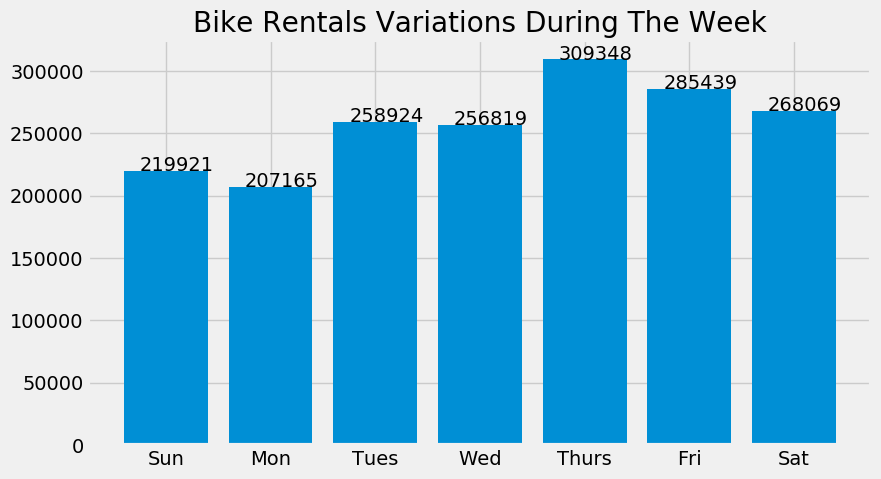

In [350]:
#group by  and sum by day of the week 
week_var = data.groupby('day_of_week').agg({'count': 'sum'})
week_var
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 7))

#plotting
fig, ax = plt.subplots(figsize = (9,5))
plt.bar(week_var.index, week_var['count'])
positions= (0,1,2,3,4,5,6)
labels = ('Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat')
plt.xticks(positions, labels)
plt.title('Bike Rentals Variations During The Week')
#add annotation
for i, v in enumerate(week_var['count']):
    plt.text(i - .25, v, str(v))

From this bar chart, we can see that there are generally more bike rentals in the middle of the week compared to the beginning and the end of the week.

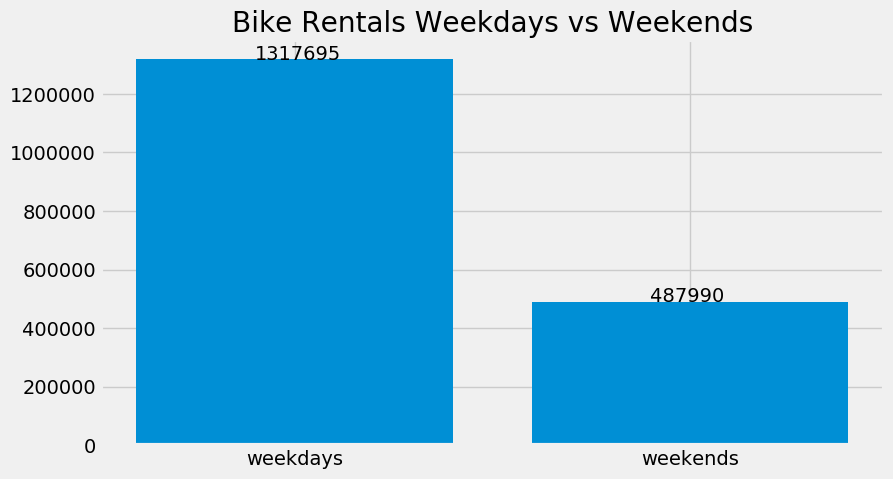

In [352]:
#create new column for weekday and weekend
data['encode_day'] = data['day_of_week']
#encode 1,2,3,4,5 as weekdays
#and 0,6 as weekend
weekday = data['day_of_week'].isin([1,2,3,4,5])
data.loc[weekday, 'encode_day'] = 'weekday'
weekend = data['day_of_week'].isin([0,6])
data.loc[weekend, 'encode_day'] = 'weekend'

#group by and sum the count by encode_day
group_by = data.groupby('encode_day').agg({'count': 'sum'})

#plotting
plt.figure(figsize = (9, 5))
plt.bar(group_by.index, group_by['count'])
plt.title('Bike Rentals Weekdays vs Weekends')
positions= (0,1)
labels = ('weekdays', 'weekends')
plt.xticks(positions, labels)

#add annotation 
for i, v in enumerate(group_by['count']):
    plt.text(i-.10, v, str(v))


For this bar chart, I created a new column that transformed '1,2,3,4,5' as Mon-Fri into 'weekday' and '0,6' as Sat, Sun into 'weekend'. The rental count is the sum rentals on weekdays vs sum rentals on weekends. As expected, the bike rentals on weekends are much less than those on weekdays.

([<matplotlib.axis.XTick at 0x234bb007a90>,
 <a list of 7 Text xticklabel objects>)

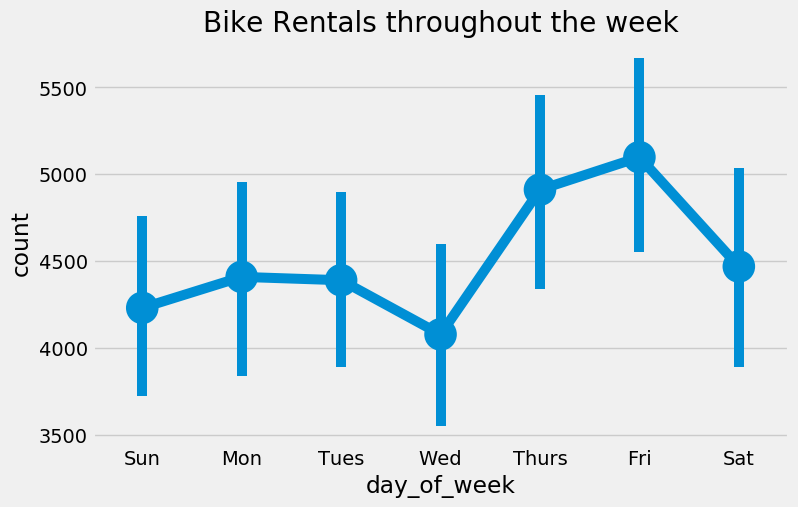

In [414]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(data = data[['day_of_week', 'count']], 
              x = "day_of_week", y = "count", ax=ax)
ax.set_title("Bike Rentals throughout the week")
positions= (0,1,2,3,4,5,6)
labels = ('Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat')
plt.xticks(positions, labels)

In this pointplot, we can see that Wednesday has much lower central tendency than other days, and Saturday has a higher central tendency than all days except for Thursday and Friday. 

## How does temperature affect bike rentals? 

Text(0.5, 1.0, 'Bike Rentals Variations by Temperature and Weather')

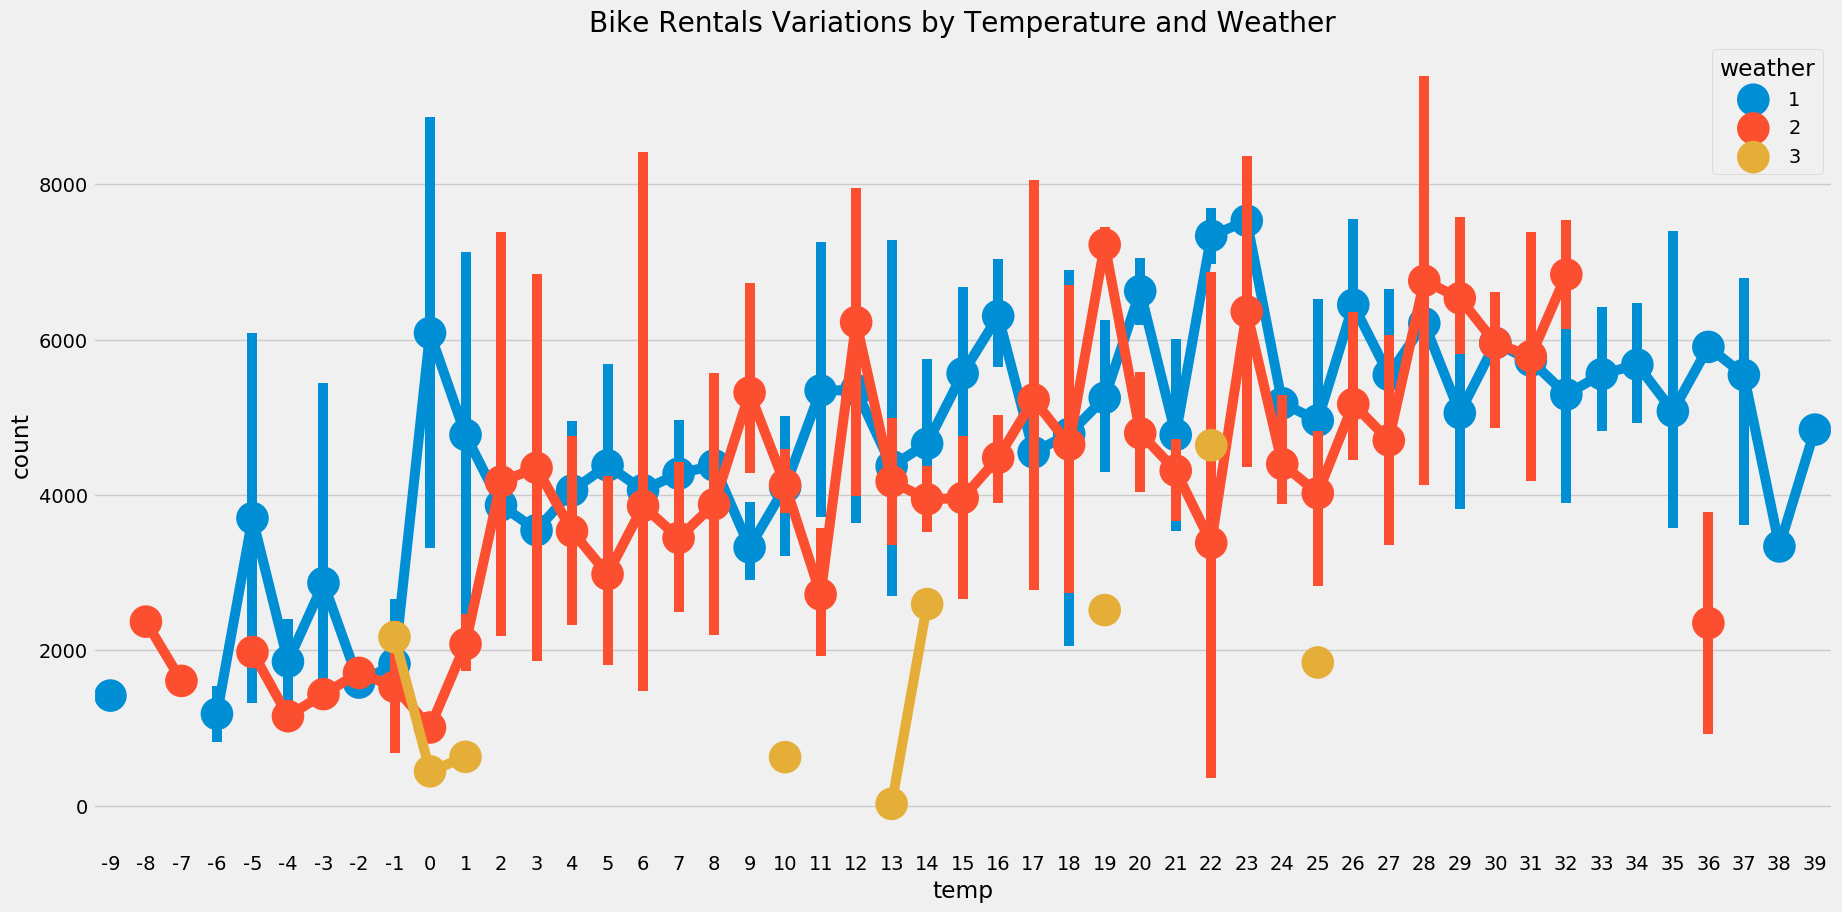

In [395]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize = (20, 10))
sns.pointplot(data = data[['temp', 'count', 'weather']], 
              x = "temp", y = "count", hue = "weather", ax=ax)
ax.set_title("Bike Rentals Variations by Temperature and Weather")

This pointplot shows that, as expected, there are less rentals when it is hot (> 33 degree) and much less rentals when it is cold ( < 0 degree). 

However, the number of rentals also changes according to weather. When temperature is high(>33), the number of rentals in weather type 1 is higher than that of type 2 and 3. When the temperature is low (<0), the number of rentals in weather type 1 is higher than that of weather type 2, followed by weather type 3. 

In other words, when the weather is clear (type 1) and it's cold (-5 to 2 degree) or hot (33-39 degree) there are still many bike rentals. 

## Do any of the non-categorical attributes have a clear non-linear dependence with number of the bike rental? 


In [389]:
categoricals = ['season', 'month', 'holiday', 'day_of_week','workingday', ' weather']
numerical = [ 'humidity', 'windspeed']

There is no linear relationship between 'count' and 'windspeed'.

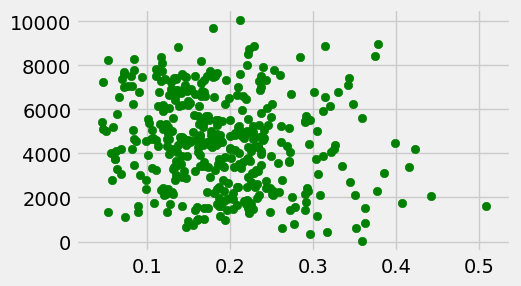

In [424]:
fig, ax = plt.subplots(figsize = (5,3))
plt.scatter(x = data['windspeed'], y = data['count'], c = 'green')

There is no linear relationship between 'count' and 'humidity'

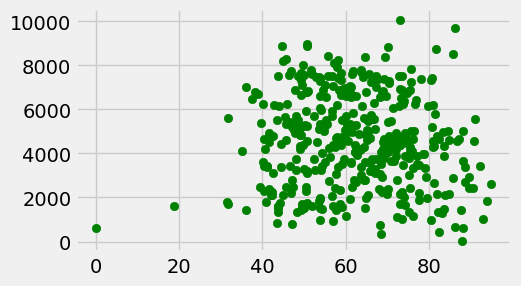

In [425]:
fig, ax = plt.subplots(figsize = (5,3))
plt.scatter(x = data['humidity'], y = data['count'], c = 'green')

In [426]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x234bd518c88>])

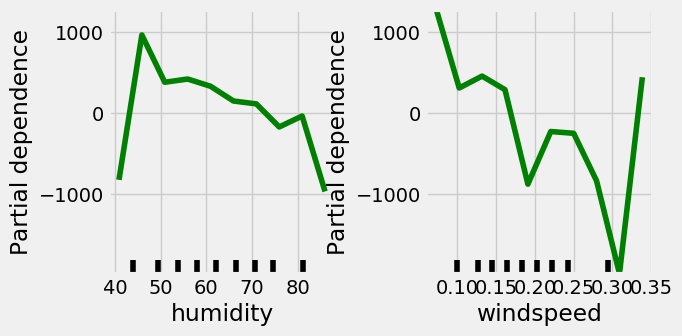

In [427]:
y = data['count']
X = data[numerical]

model = GradientBoostingRegressor()
model.fit(X,y)

plot_partial_dependence(model, features = [0,1],
                               X=X, 
                               feature_names = numerical,
                               grid_resolution = 10)

We can see that as humidity rises between 45-50, the number of bike rentals rises as well. From there, the number of rentals decreases as humidity rises. The most humid and the least humid weather has almost the same number of bike rentals. 

As windspeed decreases, we can see that bike rentals decreases as well. However, once windspeed reaches 0.30, rentals count spikes up. In other words, rentals count is high during least windy as well as windiest weather, while increasingly low in between.